In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/ga-students/DS-SF-24/master/Data/mtcars.csv"
CarData = pd.read_csv(url)
CarData.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Here is the dictionary of our data: https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html

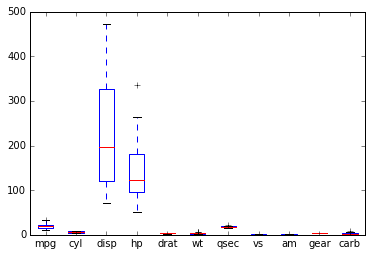

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
CarData.plot(kind = 'box')

In [3]:
Q1_hp = CarData['hp'].quantile(.25)  #Here is first Quartilefor hp
Q3_hp = CarData['hp'].quantile(.75)  #Here is third Quartile for hp
IQR_hp = Q3_hp - Q1_hp  

#### Let's get rid of outliers

In [4]:
CarData.drop(CarData[(CarData['hp'] > Q3_hp + 1.5*IQR_hp) |
                     (CarData['hp'] < Q1_hp - 1.5*IQR_hp) ].index
                        , inplace = True)

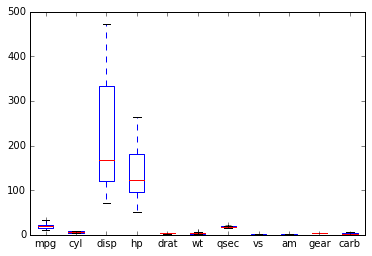

In [5]:
CarData.plot(kind = 'box')

#### Great! We have an outlier free dataset to work with!

## First: Create a correlation matrix and explore it

In [6]:
CarData.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.848252,-0.846203,-0.817454,0.686527,-0.869775,0.394328,0.655638,0.656624,0.567462,-0.575325
cyl,-0.848252,1.000000,0.903260,0.869776,-0.708753,0.785574,-0.571495,-0.805401,-0.586724,-0.594743,0.525530
disp,-0.846203,0.903260,1.000000,0.858715,-0.712171,0.887852,-0.425631,-0.706693,-0.632086,-0.626252,0.414851
hp,-0.817454,0.869776,0.858715,1.000000,-0.507509,0.724729,-0.663887,-0.753395,-0.416755,-0.352362,0.650476
drat,0.686527,-0.708753,-0.712171,-0.507509,1.000000,-0.712847,0.089908,0.442894,0.734561,0.746431,-0.098105
wt,-0.869775,0.785574,0.887852,0.724729,-0.712847,1.000000,-0.162421,-0.552654,-0.725626,-0.640649,0.481195
qsec,0.394328,-0.571495,-0.425631,-0.663887,0.089908,-0.162421,1.000000,0.742908,-0.171390,-0.117663,-0.604178
vs,0.655638,-0.805401,-0.706693,-0.753395,0.442894,-0.552654,0.742908,1.000000,0.210349,0.275662,-0.595944
am,0.656624,-0.586724,-0.632086,-0.416755,0.734561,-0.725626,-0.171390,0.210349,1.000000,0.783700,-0.088148
gear,0.567462,-0.594743,-0.626252,-0.352362,0.746431,-0.640649,-0.117663,0.275662,0.783700,1.000000,0.109379


#### What do we learn from this Corr() Matrix?

Answer: Most of the variables are highly corrolated. So, we shall be extremely careful when using variables in regression lines. We shall refrain from using correlated varaibles as inputs. 

### Let's draw scatter plot and regression plot of Mileage Per Gallon (y) vs horse power (x)

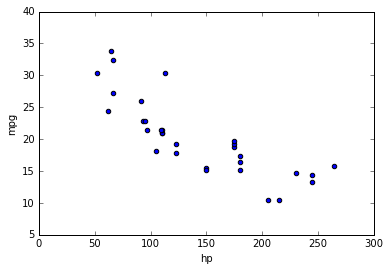

In [7]:
#Scatter plot
CarData.plot(kind = 'scatter',x = 'hp',y='mpg')

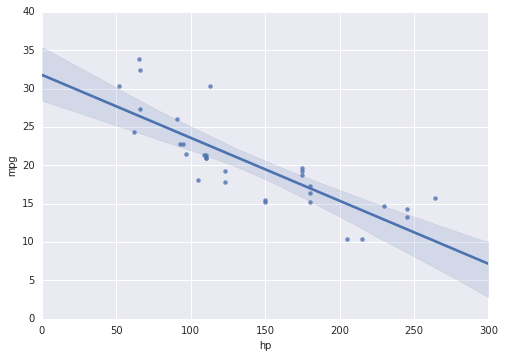

In [8]:
#regression plot
import seaborn as sns
sns.regplot(CarData.hp, CarData.mpg)

#### How do you interpret these graphs?

Answer: It looks like there is negative association between hp and mpg. That makes sense, since in order to achieve higher power you need to burn more gas!

#### Now let's find build a regression line. Use hp to predict mpg

In [9]:
from sklearn.linear_model import LinearRegression  #import
linreg = LinearRegression() #Instantiate
X = CarData[['hp']]
y= CarData['mpg']
linreg.fit(X,y)
print(linreg.intercept_)
print(linreg.coef_)

31.7917856473
[-0.08204757]


#### Write down the formula for your regression line

In [10]:
print("Mpg_hat = %f  %f * hp" %(linreg.intercept_, linreg.coef_))

Mpg_hat = 31.791786  -0.082048 * hp


#### Interpret the coefficient of hp

Answer: On average, for the cars under study, every additional horse power resulted in -0.08 loss in mpg efficiency. 

#### Let's make predictions for two cars VW Jetta and Bugatti Veyron . VW jetta has 170 hp and Bugatti Veyron has 1200 hp. What are your predictions for these two cars?

In [11]:
CarData['hp'].describe()

count     31.000000
mean     140.612903
std       60.310683
min       52.000000
25%       96.000000
50%      123.000000
75%      180.000000
max      264.000000
Name: hp, dtype: float64

In [12]:
linreg.predict([[170]])

array([ 17.84369885])

Based on the summary we found that the range of our hp data is between 52 and 264. We can make predictions for VW Jetta but not Bugatti Veyron! Actually, your predictions for Bugatti Veryron would be -66 mpg if you were to use this model!!! Our prediction for VW Jetta is 17.84 mpg. 

#### Now let's work with categorical data

Let's first create dummy variables for weight of cars. Let's categorize Cars based on weight. Those cars that are heavier than 75% of cars are going to be called "Heavy", those which are heavier than 25% of cars but lighter than the heaviest 25% cars are going to be Called "Medium" and finally, the lightest 25% cars are called "Light".

In [15]:
mask_Heavy = (CarData['wt'] > CarData['wt'].quantile(0.75))
mask_Light = (CarData['wt'] < CarData['wt'].quantile(0.25))
CarData['wt_category'] = 'Medium'
CarData.loc[mask_Heavy,'wt_category'] = 'Heavy'
CarData.loc[mask_Light,'wt_category'] = 'Light'
CarData.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,wt_category
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Medium
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Medium
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,Light
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,Medium
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,Medium


In [14]:
WeightDummy = pd.get_dummies(CarData.wt_category)
del WeightDummy['Light']
CarData = pd.concat([CarData,WeightDummy],axis = 1)
CarData.head()

AttributeError: 'DataFrame' object has no attribute 'wt_category'

In [ ]:
#Now let's visualize association between mpg and weight
CarData.boxplot(column = 'mpg', by = 'wt_category') 

#### Does the abox boxplot make sense? Why it does or why it does not?

Answer: Yes, it does makes perfect sense. The lighter cars have lower consumption whereas heavier cars use more gas.

#### Apply a multivariable regression line to discover relationship between mpg and weight categories. Print your outcomes.

In [ ]:
X = CarData[['Heavy','Medium']]
y= CarData['mpg']
linreg.fit(X,y)
print(linreg.intercept_)
print(zip(['Heavy','Medium'],linreg.coef_))

#### Write your regression line

In [ ]:
print("mph_hat = %f %f * Heavy %f * Medium" %(linreg.intercept_, linreg.coef_[0],
                                              linreg.coef_[1]))

#### Please interpret your above results

Answer: MPG of heavy cars are on average 13.475 gallons more than light cars. Mpg of Medium cars on average is 9 gallons worse than light cars. 

** Without using perdict function, predict the average mpg of light, heavy and medium cars **

Answer:
mpg[Light] = 28.0875

mpg[Medium] = 28.0875 - 9 = 19.0875

mpg[Heavy] = 28.0875 - 13.475 = 14.6125

** Now let's use predict function to predict mpg for light, heavy and medium cars **

In [ ]:
print("Light Cars: ", linreg.predict([[0,0]])) # this is our prediction for Light Cars
print("Heavy Cars: ", linreg.predict([[1,0]])) # this is our prediction for Heavy Cars
print("Medium Cars: ", linreg.predict([[0,1]])) # this is our prediction for Medium Cars